In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt

# Small paragraph as dataset
text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers."""

# Clean and split text
text = re.sub('[^A-Za-z0-9 ]+', ' ', text).lower().split()

# Create vocabulary and mappings
vocab = sorted(set(text))
word_to_index = {w: i for i, w in enumerate(vocab)}
index_to_word = {i: w for w, i in word_to_index.items()}
vocab_size = len(vocab)
embed_dim = 8   # embedding size


In [2]:
data = []
context_size = 2  # 2 words before and 2 after target

for i in range(context_size, len(text) - context_size):
    context = [text[i-2], text[i-1], text[i+1], text[i+2]]
    target = text[i]
    data.append((context, target))

print("Example pair:", data[0])


Example pair: (['we', 'are', 'to', 'study'], 'about')


In [3]:
# Random initialization
embeddings = np.random.randn(vocab_size, embed_dim) * 0.01
weights = np.random.randn(4 * embed_dim, vocab_size) * 0.01

def forward(context_ids):
    X = embeddings[context_ids].reshape(1, -1)
    logits = X.dot(weights)
    probs = np.exp(logits - np.max(logits))
    probs /= probs.sum()
    return X, probs


In [4]:
lr = 0.05
losses = []

for epoch in range(50):
    total_loss = 0
    for context, target in data:
        c_ids = [word_to_index[w] for w in context]
        X, p = forward(c_ids)
        t = word_to_index[target]

        # Calculate error and update
        y_true = np.eye(vocab_size)[[t]]
        error = p - y_true
        weights -= lr * X.T.dot(error)
        embeddings[c_ids] -= lr * error.dot(weights.T).reshape(4, embed_dim)

        total_loss += -np.log(p[0, t] + 1e-9)
    losses.append(total_loss / len(data))
    print(f"Epoch {epoch+1}: Loss = {losses[-1]:.4f}")


Epoch 1: Loss = 2.8332
Epoch 2: Loss = 2.8329
Epoch 3: Loss = 2.8327
Epoch 4: Loss = 2.8324
Epoch 5: Loss = 2.8321
Epoch 6: Loss = 2.8317
Epoch 7: Loss = 2.8313
Epoch 8: Loss = 2.8307
Epoch 9: Loss = 2.8301
Epoch 10: Loss = 2.8293
Epoch 11: Loss = 2.8283
Epoch 12: Loss = 2.8270
Epoch 13: Loss = 2.8255
Epoch 14: Loss = 2.8236
Epoch 15: Loss = 2.8211
Epoch 16: Loss = 2.8181
Epoch 17: Loss = 2.8142
Epoch 18: Loss = 2.8094
Epoch 19: Loss = 2.8033
Epoch 20: Loss = 2.7956
Epoch 21: Loss = 2.7858
Epoch 22: Loss = 2.7735
Epoch 23: Loss = 2.7580
Epoch 24: Loss = 2.7384
Epoch 25: Loss = 2.7138
Epoch 26: Loss = 2.6828
Epoch 27: Loss = 2.6440
Epoch 28: Loss = 2.5958
Epoch 29: Loss = 2.5362
Epoch 30: Loss = 2.4635
Epoch 31: Loss = 2.3759
Epoch 32: Loss = 2.2725
Epoch 33: Loss = 2.1535
Epoch 34: Loss = 2.0208
Epoch 35: Loss = 1.8778
Epoch 36: Loss = 1.7291
Epoch 37: Loss = 1.5790
Epoch 38: Loss = 1.4305
Epoch 39: Loss = 1.2855
Epoch 40: Loss = 1.1455
Epoch 41: Loss = 1.0118
Epoch 42: Loss = 0.8861
E

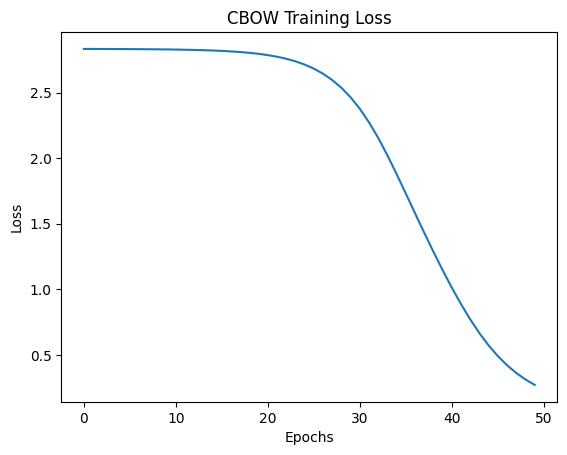

Enter 4 context words separated by spaces:  we are study idea


Predicted Target Word: about


In [5]:
plt.plot(losses)
plt.title("CBOW Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

def predict(context_words):
    c_ids = [word_to_index[w] for w in context_words]
    X, p = forward(c_ids)
    return index_to_word[np.argmax(p)]

# User input for 4 context words
user_input = input("Enter 4 context words separated by spaces: ").lower().split()
if len(user_input) != 4:
    print("Please enter exactly 4 words.")
else:
    print("Predicted Target Word:", predict(user_input))
